62/62 [==============================] - 3s 56ms/step - loss: 0.0091


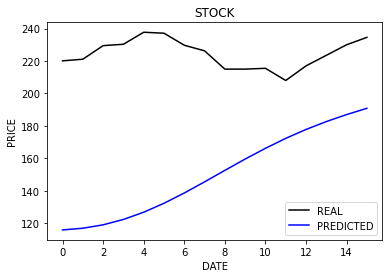

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
trainning_set = dataset_train.iloc[:, 1:2].values #iolc讀其中一個欄位
dataset_train.head()
sc = MinMaxScaler(feature_range = (0 , 1)) #0-1的範圍
training_set_scaled = sc.fit_transform(trainning_set)
# print(training_set_scaled[0])

x_train = []
y_train = []
for i in range(60,2035): #過去60天資料有2035筆
    x_train.append(training_set_scaled[i-60:i , 0])
    y_train.append(training_set_scaled[i , 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
# print(x_train.shape[0])  1975天
# print(x_train.shape[1])
x_train = np.reshape(x_train,(1975,60,1))
# print(x_train[100])
# print(y_train[100])

model = Sequential()
model.add(LSTM(units = 50, return_sequences=True , input_shape=(60,1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50 )) #不加return_sequences 預設false
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train,y_train,epochs=1,batch_size=32)

dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = datase_test.iloc[:,1:2].values  #第一第二列
data_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(dataset_test) - 60:].values
# print(data_total.shape[0])
inputs = inputs.reshape(-1,1)
# print(inputs.shape[0])
inputs = sc.transform(inputs)
# print(inputs.shape[0])
x_test = []

for i in range(60,76):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
# print(x_test.shape[0])   16
# print(x_test.shape[1])   60

x_test = np.reshape(x_test,(16,60,1))
predicted_stock_value = model.predict(x_test)
predicted_stock_value = sc.inverse_transform(predicted_stock_value)

# print(real_stock_price)
# print(predicted_stock_value)

plt.plot(real_stock_price,color = 'black' , label='REAL')
plt.plot(predicted_stock_value , color = 'blue' , label='PREDICTED')
plt.title('STOCK')
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.legend()
plt.show()